# Forecasting Quarterly Financial Statements

This exercise is focused on forecasting quarterly financials. The lessons learned can apply to many complex time series, not only quarterly financials.

We have already covered how to forecast simple time series, those which seem to have a linear or constant path over timne. But if there are any other patterns in the data, such as seasonality, we must use more complex models to handle them.

## Load Financial Statement Data

Here I will use my `finstmt` package to load the quarterly financials for Walmart.

In [1]:
from finstmt import IncomeStatements, BalanceSheets, FinancialStatements
import pandas as pd

bs_df = pd.read_excel('WMT Balance Sheet.xlsx', index_col=0)
inc_df = pd.read_excel('WMT Income Statement.xlsx', index_col=0)

bs_data = BalanceSheets.from_df(bs_df)
inc_data = IncomeStatements.from_df(inc_df)
stmts = FinancialStatements(inc_data, bs_data)

/home/nick/.local/share/virtualenvs/fin-model-course-eIFMSc8A/lib/python3.7/site-packages/finstmt/findata/database.py:78: UserWarning: Previously had ebit extracted from "Operating Income". Replacing with value from "EBIT"
  warnings.warn(f'Previously had {item_config.key} '


### What just happened?

Don't worry the warning. It's just saying that both operating income and EBIT were found in the statement data, and so it's using EBIT for the EBIT measure. It prints a warning because some companies report operating income but not EBIT, in which case we want to use operating income as EBIT. So the package hits operating income first, sets EBIT to that, but then later finds EBIT in the file, and raises the warning to let you know it found two possible values for the same item.

Let's view the data. 

In [2]:
stmts

,01/31/2010,04/30/2010,07/31/2010,10/31/2010,01/31/2011,04/30/2011,07/31/2011,10/31/2011,01/31/2012,04/30/2012,...,04/30/2017,07/31/2017,10/31/2017,01/31/2018,04/30/2018,07/31/2018,10/31/2018,01/31/2019,04/30/2019,07/31/2019
Revenue,"$113,622,000,000","$99,811,000,000","$103,726,000,000","$101,952,000,000","$116,360,000,000","$104,189,000,000","$109,366,000,000","$110,226,000,000","$122,728,000,000","$113,010,000,000",...,"$117,542,000,000","$123,355,000,000","$123,179,000,000","$136,267,000,000","$122,690,000,000","$128,028,000,000","$124,894,000,000","$138,793,000,000","$123,925,000,000","$130,377,000,000"
Cost of Goods Sold,"$84,740,000,000","$74,618,000,000","$77,438,000,000","$75,819,000,000","$87,071,000,000","$78,177,000,000","$81,770,000,000","$82,591,000,000","$92,455,000,000","$85,178,000,000",...,"$87,688,000,000","$91,521,000,000","$91,547,000,000","$102,640,000,000","$91,707,000,000","$95,571,000,000","$93,116,000,000","$104,907,000,000","$93,034,000,000","$97,923,000,000"
Gross Profit,"$28,882,000,000","$25,193,000,000","$26,288,000,000","$26,133,000,000","$29,289,000,000","$26,012,000,000","$27,596,000,000","$27,635,000,000","$30,273,000,000","$27,832,000,000",...,"$29,854,000,000","$31,834,000,000","$31,632,000,000","$33,627,000,000","$30,983,000,000","$32,457,000,000","$31,778,000,000","$33,886,000,000","$30,891,000,000","$32,454,000,000"
R&D Expense,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
SG&A Expense,"$21,424,000,000","$19,456,000,000","$20,098,000,000","$20,522,000,000","$21,285,000,000","$20,116,000,000","$21,213,000,000","$21,757,000,000","$21,939,000,000","$21,445,000,000",...,"$24,617,000,000","$25,865,000,000","$26,868,000,000","$29,160,000,000","$25,829,000,000","$26,707,000,000","$26,792,000,000","$27,819,000,000","$25,946,000,000","$26,871,000,000"
Depreciation & Amortization Expense,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Other Operating Expenses,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Operating Expense,"$21,424,000,000","$19,456,000,000","$20,098,000,000","$20,522,000,000","$21,285,000,000","$20,116,000,000","$21,213,000,000","$21,757,000,000","$21,939,000,000","$21,445,000,000",...,"$24,617,000,000","$25,865,000,000","$26,868,000,000","$29,160,000,000","$25,829,000,000","$26,707,000,000","$26,792,000,000","$27,819,000,000","$25,946,000,000","$26,871,000,000"
Earnings Before Interest and Taxes,"$7,279,000,000","$5,645,000,000","$6,096,000,000","$5,510,000,000","$8,922,000,000","$5,761,000,000","$6,269,000,000","$5,778,000,000","$8,135,000,000","$6,273,000,000",...,"$5,159,000,000","$5,014,000,000","$3,307,000,000","$3,312,000,000","$3,210,000,000","$818,000,000","$3,062,000,000","$6,207,000,000","$5,766,000,000","$5,484,000,000"
Interest Expense,"$522,000,000","$522,000,000","$542,000,000","$569,000,000","$572,000,000","$562,000,000","$600,000,000","$600,000,000","$558,000,000","$573,000,000",...,"$598,000,000","$613,000,000","$583,000,000","$536,000,000","$530,000,000","$554,000,000","$593,000,000","$669,000,000","$673,000,000","$641,000,000"


As you can see, we have quite a bit of data, 39 periods. This is plenty to get a pretty accurate forecast even considering seasonality.

## Simple or Complex Time-Series?

We can determine what type of time-series we are dealing with by plotting it. Let's take a look at sales.

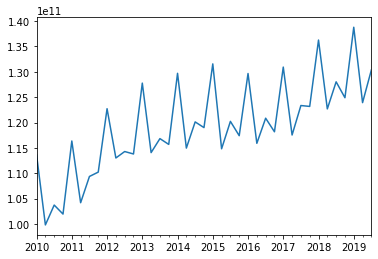

In [3]:
%matplotlib inline
stmts.revenue.plot.line()

That definitely does not look linear. There are distinct patterns happening within every year. The data shows a very distinct seasonality. Therefore the simple trend, average, and recent value models will not be able to capture the patterns in the time-series.

## Forecasting Using the OLS Dummy Variable Approach

This approach can work well for quarterly financials which show simple seasonality (same kind of pattern every year). It does not require any complex tooling or models. It is just a regular trend regression, but then we add some additional $X$ variables to capture the seasonality.

We are going to add dummy variables, one for each quarter of the year. A dummy variable is just a variable which is either 1 or 0, basically meaning true or false, yes or no, etc. What we are going to construct is four variables. The first will be 1 if the time period is in the first quarter of the year and 0 otherwise. The second will be 1 if the time period is in the second quarter of the year and 0 otherwise. And so on for the third and fourth quarters.

### Construct Dummy Variables

Let's take a quick look again at what we're working with.

In [4]:
stmts.revenue.head(10)

2010-01-31    1.136220e+11
2010-04-30    9.981100e+10
2010-07-31    1.037260e+11
2010-10-31    1.019520e+11
2011-01-31    1.163600e+11
2011-04-30    1.041890e+11
2011-07-31    1.093660e+11
2011-10-31    1.102260e+11
2012-01-31    1.227280e+11
2012-04-30    1.130100e+11
dtype: float64

Let's convert this to a `DataFrame` so we can add additional columns.

In [5]:
rev_df = pd.DataFrame(stmts.revenue)
rev_df.columns = ['Revenue']
rev_df.head()

,Revenue
2010-01-31,1.136220e+11
2010-04-30,9.981100e+10
2010-07-31,1.037260e+11
2010-10-31,1.019520e+11
2011-01-31,1.163600e+11


Let's add the time variable, similarly to when we did the trend regressions.

In [6]:
rev_df['t'] = range(len(rev_df))
rev_df.head()

,Revenue,t
2010-01-31,1.136220e+11,0
2010-04-30,9.981100e+10,1
2010-07-31,1.037260e+11,2
2010-10-31,1.019520e+11,3
2011-01-31,1.163600e+11,4


In [7]:
rev_df.tail()  # end of df

,Revenue,t
2018-07-31,1.280280e+11,34
2018-10-31,1.248940e+11,35
2019-01-31,1.387930e+11,36
2019-04-30,1.239250e+11,37
2019-07-31,1.303770e+11,38


We can create a variable which contains the month of the year. Then we can construct dummy variables out of this.

In [8]:
rev_df['Month'] = [date.month for date in rev_df.index]
rev_df.head()

,Revenue,t,Month
2010-01-31,1.136220e+11,0,1
2010-04-30,9.981100e+10,1,4
2010-07-31,1.037260e+11,2,7
2010-10-31,1.019520e+11,3,10
2011-01-31,1.163600e+11,4,1


We could certainly write up some if conditions in a loop to create these dummy variables. But this is such a common operation that `pandas` has made a function for this, `get_dummies()`.

In [9]:
reg_df = pd.get_dummies(rev_df, columns=['Month'])
reg_df.head(10)

,Revenue,t,Month_1,Month_4,Month_7,Month_10
2010-01-31,1.136220e+11,0,1,0,0,0
2010-04-30,9.981100e+10,1,0,1,0,0
2010-07-31,1.037260e+11,2,0,0,1,0
2010-10-31,1.019520e+11,3,0,0,0,1
2011-01-31,1.163600e+11,4,1,0,0,0
2011-04-30,1.041890e+11,5,0,1,0,0
2011-07-31,1.093660e+11,6,0,0,1,0
2011-10-31,1.102260e+11,7,0,0,0,1
2012-01-31,1.227280e+11,8,1,0,0,0
2012-04-30,1.130100e+11,9,0,1,0,0


Now this is set up as we need it for the regression. Let's just wrap this up in a function.

In [10]:
def reg_df_monthly_dummies_from_by_date_series(series, column_name):
    """
    Takes a series which has dates as the index, and creates a DataFrame with dummy variables for months of those dates
    """
    df = pd.DataFrame(series)
    df.columns = [column_name]
    df['t'] = range(len(rev_df))
    df['Month'] = [date.month for date in df.index]
    reg_df = pd.get_dummies(df, columns=['Month'])
    return reg_df

reg_df_monthly_dummies_from_by_date_series(stmts.cash, 'Cash').head()

,Cash,t,Month_1,Month_4,Month_7,Month_10
2010-01-31,7907000000,0,1,0,0,0
2010-04-30,8516000000,1,0,1,0,0
2010-07-31,10195000000,2,0,0,1,0
2010-10-31,10616000000,3,0,0,0,1
2011-01-31,7395000000,4,1,0,0,0


### Fit Model (Run Regression)

So now we have our regression `DataFrame`, let's look at that again.

In [11]:
reg_df.head()

,Revenue,t,Month_1,Month_4,Month_7,Month_10
2010-01-31,1.136220e+11,0,1,0,0,0
2010-04-30,9.981100e+10,1,0,1,0,0
2010-07-31,1.037260e+11,2,0,0,1,0
2010-10-31,1.019520e+11,3,0,0,0,1
2011-01-31,1.163600e+11,4,1,0,0,0


We will need to tell `statsmodels` to pick up all the Month columns. We can either type them out manually, or we can use this code to get the names:

In [12]:
month_cols = [col for col in reg_df.columns if 'Month' in col]
month_cols

['Month_1', 'Month_4', 'Month_7', 'Month_10']

In [13]:
x_cols = ['t'] + month_cols
x_cols

['t', 'Month_1', 'Month_4', 'Month_7', 'Month_10']

Now actually run the regression.

In [14]:
import statsmodels.api as sm

model = sm.OLS(reg_df['Revenue'], sm.add_constant(reg_df[x_cols]), hasconst=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     115.4
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           2.79e-19
Time:                        07:14:47   Log-Likelihood:                -896.78
No. Observations:                  39   AIC:                             1804.
Df Residuals:                      34   BIC:                             1812.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.605e+10   6.32e+08    136.083      0.000    8.48e+10    8.73e+10
t           6.095e+08   3.58e+07     17.022      0.000    5.37e+08    6.82e+08
Month_1     3.072e+10   7.02e+08     43.785      0.000    2.93e+10    3.21e+10
Month_4     1.646e+10   7.08e+08     23.262      0.000     1.5e+10    1.79e+10
Month_7     2.047e+10   7.15e+08     28.623      0.000     1.9e+10    2.19e+10
Month_10     1.84e+10   7.37e+08     24.981      0.000    1.69e+10    1.99e+10
==============================================================================
Omnibus:                        2.366   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                1.341
Skew:                           0.090   Prob(JB):                        0.512
Kurtosis:                       2.110   Cond. No.                     8.95e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Predict Future

Now we can plug the values into the regression equation to get a forecast for any $t$. First determine what our last $t$ was so we can use the next $t$.

In [15]:
last_t = reg_df['t'].max()
t = last_t + 1
t

39

Also determine which quarter is next, so we can use the appropriate dummmy.

In [16]:
last_q = reg_df.index.max()
last_q

Timestamp('2019-07-31 00:00:00')

The next quarter will end on 10/31, so we want `Month_10` set to 1 and the rest to 0. With the others 0, they drop out of the equation. So we can just do the intercept plus $t$ multiplied by its slope plus the appropriate dummy.

In [17]:
fcst = results.params['const'] + results.params['t'] * t + results.params['Month_10']
fcst

128225479674.79666

It's kind of hard to see if it worked well with a single value. So let's use `pandas.date_range` to construct the future dates and fill in the forecast values for the next few years. Here I am starting the date range from the last quarter, advancing it in three month steps (`freq='3M'`), and ending it after 12 periods (3 years).

In [18]:
fcst_dates = pd.date_range(start=last_q, freq='3M', periods=12)
fcst_dates

DatetimeIndex(['2019-07-31', '2019-10-31', '2020-01-31', '2020-04-30',
               '2020-07-31', '2020-10-31', '2021-01-31', '2021-04-30',
               '2021-07-31', '2021-10-31', '2022-01-31', '2022-04-30'],
              dtype='datetime64[ns]', freq='3M')

Let's use a dictionary to collect the values, then create a series from the dictionary. Here we will need some logic to include the correct dummy and $t$.

In [19]:
forecasts = {}
for i, date in enumerate(fcst_dates):
    t_offset = i + 1
    t = last_t + t_offset
    month = date.month
    forecasts[date] = results.params['const'] + results.params['t'] * t + results.params[f'Month_{month}']
forecasts

{Timestamp('2019-07-31 00:00:00', freq='3M'): 130296889024.39017,
 Timestamp('2019-10-31 00:00:00', freq='3M'): 128834936991.86984,
 Timestamp('2020-01-31 00:00:00', freq='3M'): 141759518292.68283,
 Timestamp('2020-04-30 00:00:00', freq='3M'): 128110218292.68283,
 Timestamp('2020-07-31 00:00:00', freq='3M'): 132734718292.68283,
 Timestamp('2020-10-31 00:00:00', freq='3M'): 131272766260.1625,
 Timestamp('2021-01-31 00:00:00', freq='3M'): 144197347560.97552,
 Timestamp('2021-04-30 00:00:00', freq='3M'): 130548047560.97551,
 Timestamp('2021-07-31 00:00:00', freq='3M'): 135172547560.97552,
 Timestamp('2021-10-31 00:00:00', freq='3M'): 133710595528.45518,
 Timestamp('2022-01-31 00:00:00', freq='3M'): 146635176829.2682,
 Timestamp('2022-04-30 00:00:00', freq='3M'): 132985876829.26819}

Now create the series.

In [20]:
fcst_series = pd.Series(forecasts)
fcst_series

2019-07-31    1.302969e+11
2019-10-31    1.288349e+11
2020-01-31    1.417595e+11
2020-04-30    1.281102e+11
2020-07-31    1.327347e+11
2020-10-31    1.312728e+11
2021-01-31    1.441973e+11
2021-04-30    1.305480e+11
2021-07-31    1.351725e+11
2021-10-31    1.337106e+11
2022-01-31    1.466352e+11
2022-04-30    1.329859e+11
dtype: float64

Now plot the series.

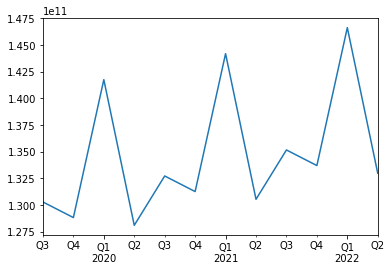

In [21]:
fcst_series.plot.line()

It seems to have the same pattern as the earlier data. Now double check by putting the historical and forecast together.

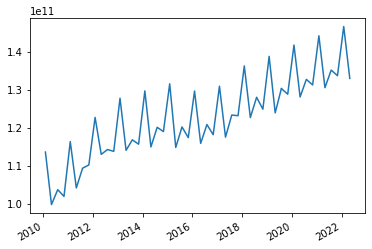

In [22]:
full_series = pd.concat([stmts.revenue, fcst_series])
full_series.plot.line()

Looks like we did a pretty good job!

## Forecasting by Using the Automated Software Approach

The previous approach worked well because we have regular quarterly data (they didn't change their quarter dates), we don't have any missing data, and the pattern was very consistent over time. These will not always be the case. When the time-series gets even more complex, more complex models are required, e.g. ARIMA, GARCH, but these are far outside the scope of the course. So what can we do if we have a very complex time series? Well there are experts out there who have already built in a process of selecting the best model, and released packages which make it easy to use. 

I have taken the best practices for forecasting and built it into the `finstmt` package, so we can look at using that. But under the hood, `finstmt` is using `fbprophet` as the main package which handles all the time-series forecasting. It is a package open-sourced by Facebook which they developed after running many, many forecasts at incredible scale. They are not even using standard time series models but have developed their own model which is more robust to missing and irregular data. It has wide-ranging applications beyond forecasting financial statement data. You can read more about the package here: https://facebook.github.io/prophet/

### Install `fbprophet`

It's actually not the most straightforward to install `fbprophet`, because it's doing some pretty heavy stuff under the hood. To increase performance, it's actually compiling C++ code to run the models. So we can't install it like a normal package because it needs a C++ compiler to come along with it.

In Windows search, type Anaconda, and see Anaconda Prompt come up in the results. Right click it, and you should see "Run as administrator". Click that and then Yes to allow changes to the device. Then you should see Administrator in the top of the terminal that comes up. 



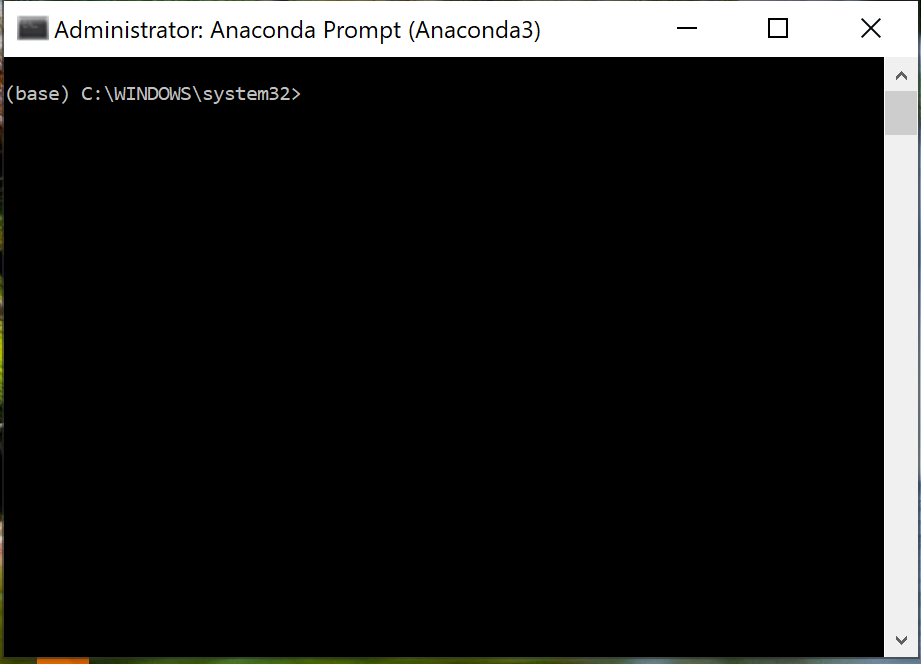

In that terminal, type `conda install -c conda-forge fbprophet` and hit enter. It should take some time where it is saying things like "collecting package metadata" and "solving environment". 

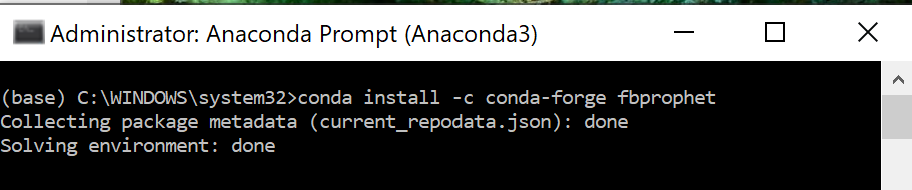

After some time it will ask you whether to proceed. Type `y` and then hit enter.

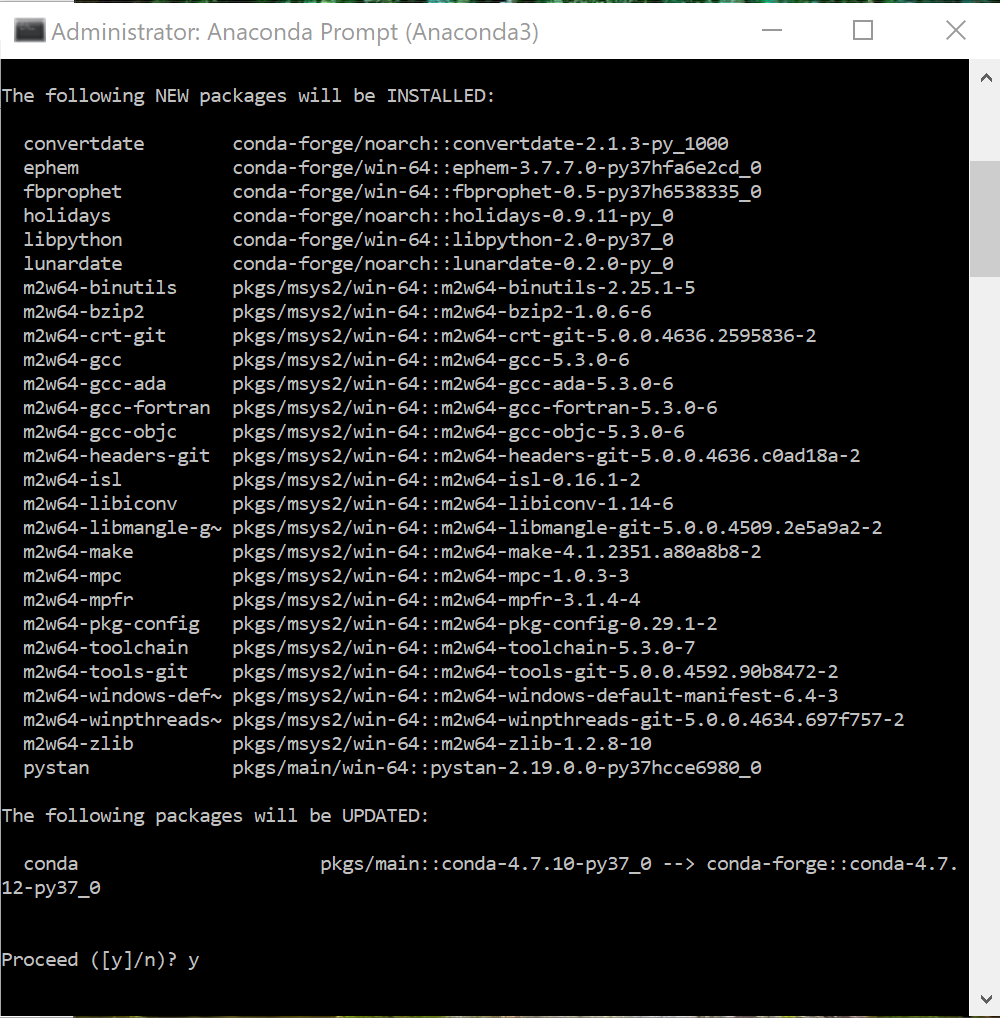

 It should then install all the packages. After a while, you should see a successful install.

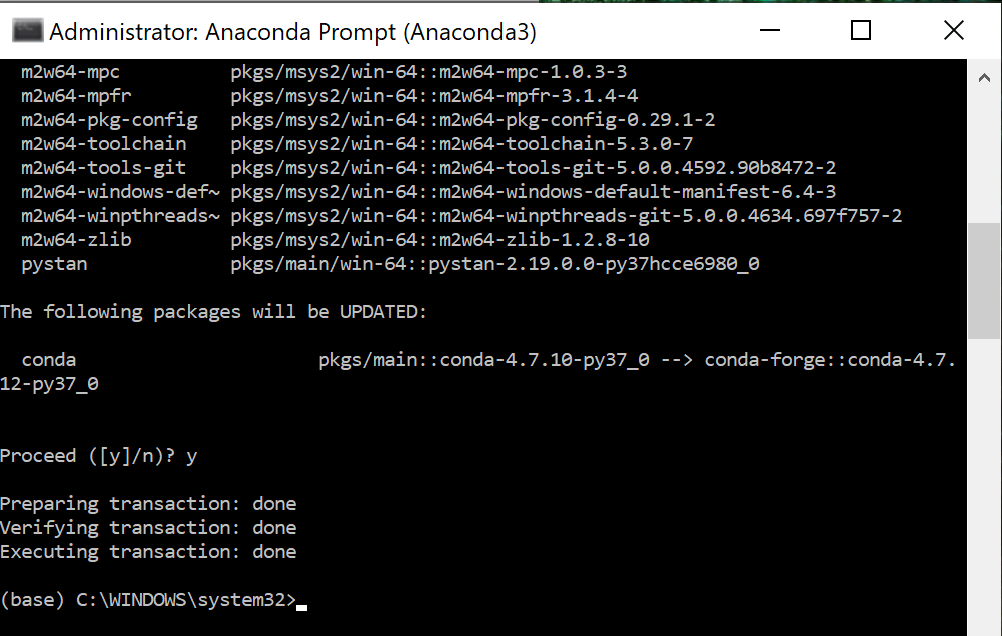

## Upgrade `finstmt`

I have added the forecasting functionality to `finstmt` since we last used it. Currently you have version `0.2.1` installed, but we need version `0.3.1` for the exercise. Thankfully we can just run a simple command here to update it. It's the same as the install command but with `--upgrade` added.

In [23]:
!pip install --upgrade finstmt

Requirement already up-to-date: finstmt in /home/nick/.local/share/virtualenvs/fin-model-course-eIFMSc8A/lib/python3.7/site-packages (0.3.1)
You should consider upgrading via the 'pip install --upgrade pip' command.


After you run this, if you are not doing it before the exercise, you will need to restart the kernel and re-run loading the financial statements. 

## Run Forecasts

Forecasting the entire financial statements with `finstmt` is as easy as calling `.forecast`. You can pass to `.forecast` how many periods you want to forecast and the frequency. The default is to forecast 5 periods with annual frequency. Here we have quarterly data, so we will have to pass `3M` as the `freq`. Also we want to extend it to 12 periods.

But before we run the forecast, we want to set the forecast method for all the items to `auto` which means use `fbprophet` for the forecast. If your data does not have seasonality, then some combination of `cagr`, `trend`, `mean`, and `recent` may be used.

In [24]:
stmts.config.update_all(['forecast_config', 'method'], 'auto')

Now run the forecast.

In [25]:
fcst_stmts = stmts.forecast(periods=12, freq='3M')

INFO: Forecasting Income Statement


100%|██████████| 16/16 [00:28<00:00,  1.78s/it]

INFO: Forecasting Balance Sheet



INFO:finstmt:Forecasting Balance Sheet
100%|██████████| 37/37 [01:23<00:00,  2.27s/it]


Let's take a look at what it did.

In [26]:
fcst_stmts

,10/31/2019,01/31/2020,04/30/2020,07/31/2020,10/31/2020,01/31/2021,04/30/2021,07/31/2021,10/31/2021,01/31/2022,04/30/2022,07/31/2022
Revenue,"$129,051,599,368","$141,606,952,670","$129,953,756,551","$133,086,847,676","$131,749,338,818","$145,533,026,022","$132,734,331,112","$136,889,100,410","$135,459,141,661","$149,631,290,465","$135,479,381,872","$140,492,173,094"
Cost of Goods Sold,"$96,718,507,903","$106,676,669,486","$97,917,763,732","$99,634,292,020","$98,803,691,301","$109,728,130,435","$100,229,794,909","$102,819,646,337","$101,876,336,138","$113,653,556,732","$102,650,167,229","$106,027,528,229"
Gross Profit,"$32,333,091,466","$34,930,283,184","$32,035,992,819","$33,452,555,656","$32,945,647,517","$35,804,895,587","$32,504,536,203","$34,069,454,073","$33,582,805,523","$35,977,733,733","$32,829,214,643","$34,464,644,866"
R&D Expense,-,-,-,-,-,-,-,-,-,-,-,-
SG&A Expense,"$27,742,352,061","$28,564,408,246","$27,513,101,060","$28,359,612,279","$28,755,446,047","$30,103,973,457","$28,067,475,650","$29,031,682,667","$29,347,679,231","$30,792,174,049","$28,639,681,643","$29,691,490,527"
Depreciation & Amortization Expense,-,-,-,-,-,-,-,-,-,-,-,-
Other Operating Expenses,-,-,-,-,-,-,-,-,-,-,-,-
Operating Expense,"$27,742,352,061","$28,564,408,246","$27,513,101,060","$28,359,612,279","$28,755,446,047","$30,103,973,457","$28,067,475,650","$29,031,682,667","$29,347,679,231","$30,792,174,049","$28,639,681,643","$29,691,490,527"
Earnings Before Interest and Taxes,"$4,590,739,405","$6,365,874,938","$4,522,891,759","$5,092,943,376","$4,190,201,470","$5,700,922,129","$4,437,060,553","$5,037,771,406","$4,235,126,292","$5,185,559,684","$4,189,533,000","$4,773,154,338"
Interest Expense,"$641,234,602","$632,236,583","$595,010,458","$615,605,517","$646,453,108","$607,742,305","$632,373,687","$634,051,358","$654,184,001","$631,094,536","$680,095,490","$649,180,270"


We can also plot a subset of the results.

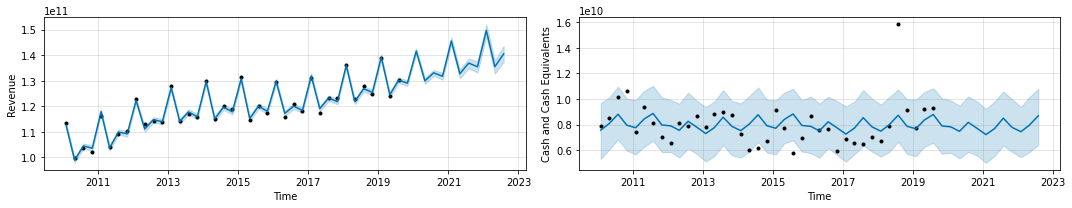

In [27]:
fcst_stmts.plot(subset=['revenue', 'cash'])

Or plot the entire results.

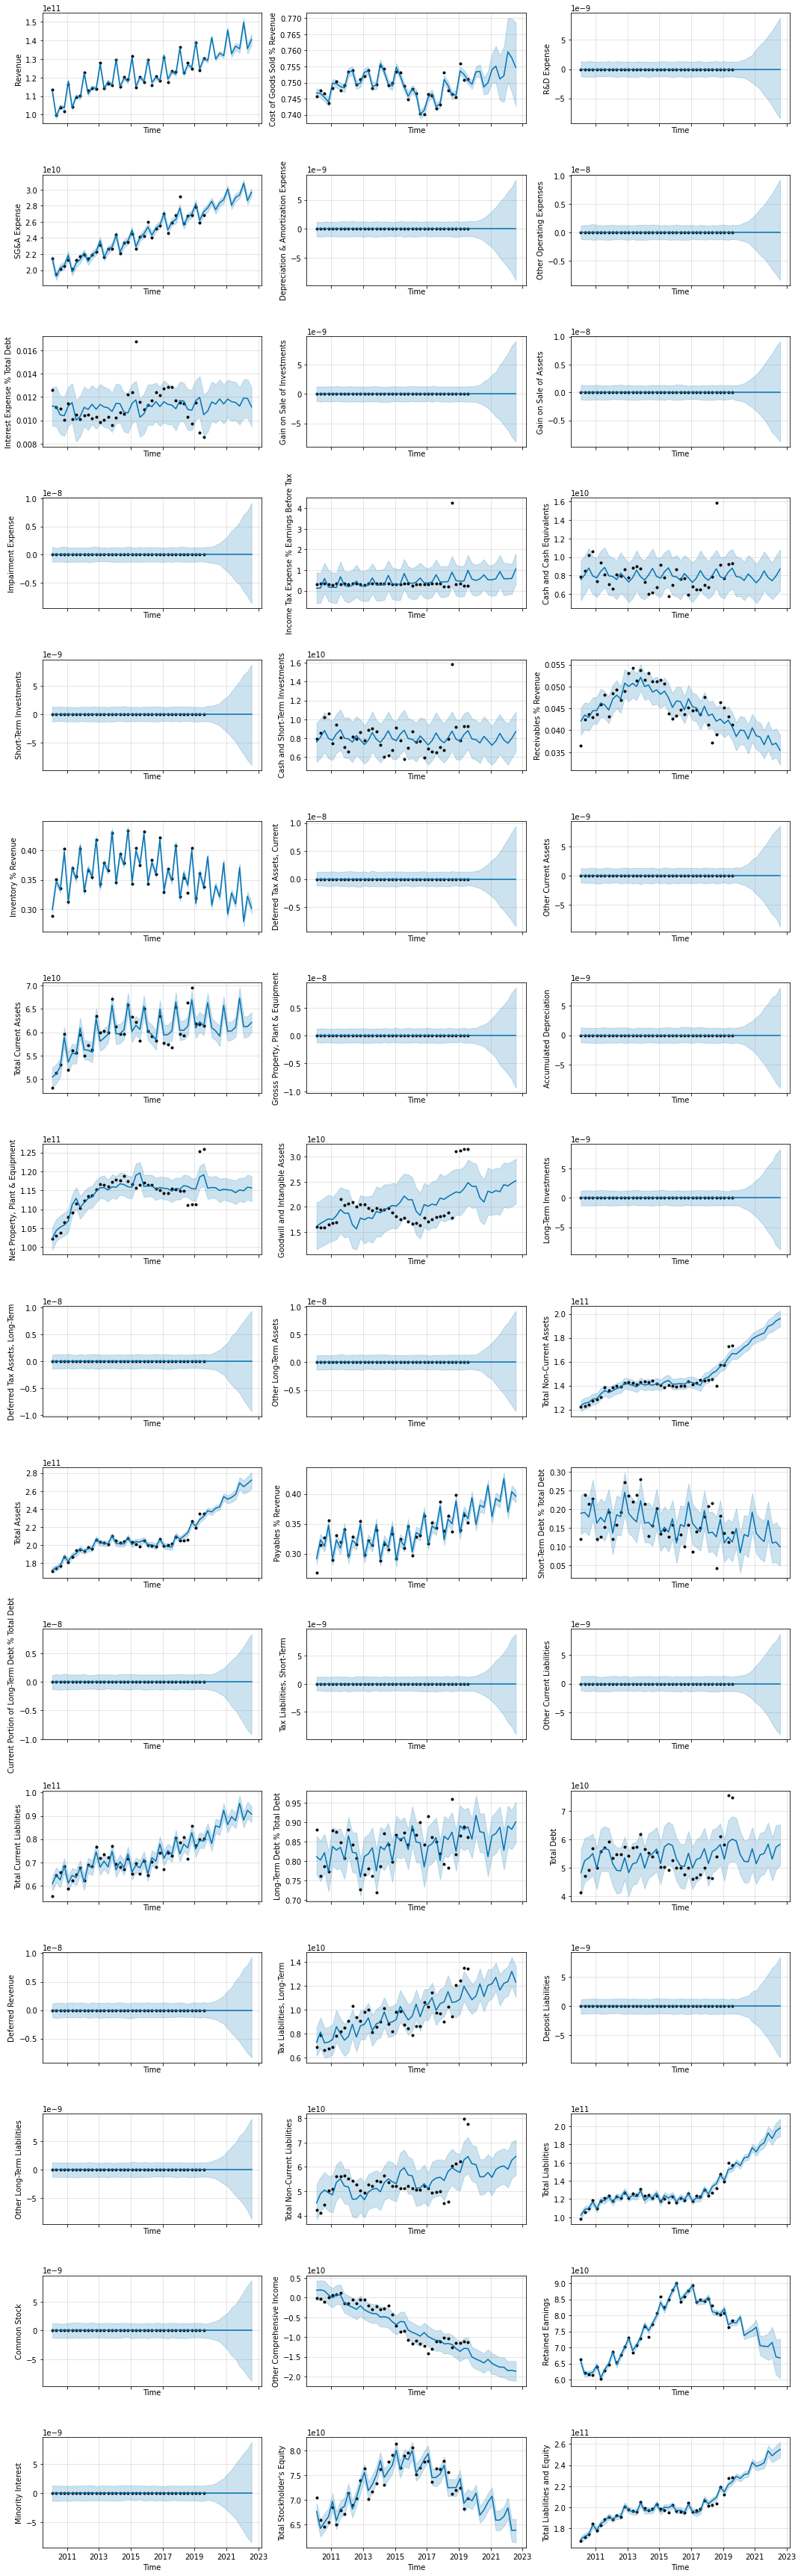

In [28]:
fcst_stmts.plot()

We can see it has forecasted the entire financial statements 12 periods into the future. How did it get there? We can take a look at the assumptions used in the forecast.

In [29]:
fcst_stmts.forecast_assumptions

,Method,% of,Cap,Floor
Revenue,auto,None,None,None
Cost of Goods Sold,auto,revenue,None,None
R&D Expense,auto,None,None,None
SG&A Expense,auto,None,None,None
Depreciation & Amortization Expense,auto,None,None,None
Other Operating Expenses,auto,None,None,None
Interest Expense,auto,total_debt,None,None
Gain on Sale of Investments,auto,None,None,None
Gain on Sale of Assets,auto,None,None,None
Impairment Expense,auto,None,None,None


All of them are using the method `auto` which means let `fbprophet` decide how to forecast it. Some items are being forecasted as percentages of other items. Let's take a closer look at some of these forecasts. After the forecast has run, in the forecast statements, a `.forecasts` dictionary is created, where it has keys of the same keys used to look up the financial items and values as a `Forecast` object. From this `Forecast` object we can get more information such as the model, as well as plots.

In [30]:
fig = fcst_stmts.forecasts['revenue'].plot()

We can see that `fbprophet` also did a good job with the patterns in the time series. It also has a nice plotting output which shows the historical points as well as the historical fit and the predictions, and confidence intervals for the predictions.

For items which are forecasted as a percentage of another item, the forecast is actually on those percentages, then those percentages are combined with the other item to create the forecast. So when you view the plots it will be a plot of forecasting the percentages.

In [31]:
fig3 = fcst_stmts.forecasts['cogs'].plot()

### Modifying `finstmt` Forecasts

`finstmt` has a configuration system so you can modify how any item is forecasted, and as well as do things like add custom names for items or add additional items. Let's look at how to update a forecast configuration using this configuration system.

Say that the company we are forecasting has a very flexible workforce. They are able to hire labor when needed and lay them off when not. So the SG&A expense for this company in particular should be tied to sales, while this is typically not what you want for most companies. Let's update the forecast config to make SG&A forecasted as a percentage of sales.

We can find via tab complete that the key for SG&A is `sga` and that for sales is `revenue`. We will use these keys for the config.

In [32]:
stmts.

SyntaxError: invalid syntax (<ipython-input-32-d7cdffa3f96a>, line 1)

You can `get` and `set` configs, but the easiest way to modify them is to `update` them.

In [33]:
stmts.config.update('sga', ['forecast_config', 'pct_of'], 'revenue')
stmts.config.update('cash', ['forecast_config', 'method'], 'mean')

Now we can look at the forecast assumptions to see SG&A now is based off the revenue forecast.

In [34]:
stmts.forecast_assumptions

,Method,% of,Cap,Floor
Revenue,auto,None,None,None
Cost of Goods Sold,auto,revenue,None,None
R&D Expense,auto,None,None,None
SG&A Expense,auto,revenue,None,None
Depreciation & Amortization Expense,auto,None,None,None
Other Operating Expenses,auto,None,None,None
Interest Expense,auto,total_debt,None,None
Gain on Sale of Investments,auto,None,None,None
Gain on Sale of Assets,auto,None,None,None
Impairment Expense,auto,None,None,None


Finally run the forecast again.

In [35]:
fcst_stmts = stmts.forecast(periods=12, freq='3M')

INFO: Forecasting Income Statement


INFO:finstmt:Forecasting Income Statement
100%|██████████| 16/16 [00:28<00:00,  1.76s/it]

INFO: Forecasting Balance Sheet



INFO:finstmt:Forecasting Balance Sheet
100%|██████████| 37/37 [01:22<00:00,  2.23s/it]


In [36]:
fcst_stmts

,10/31/2019,01/31/2020,04/30/2020,07/31/2020,10/31/2020,01/31/2021,04/30/2021,07/31/2021,10/31/2021,01/31/2022,04/30/2022,07/31/2022
Revenue,"$129,051,599,368","$141,606,952,670","$129,953,756,551","$133,086,847,676","$131,749,338,818","$145,533,026,022","$132,734,331,112","$136,889,100,410","$135,459,141,661","$149,631,290,465","$135,479,381,872","$140,492,173,094"
Cost of Goods Sold,"$96,718,507,903","$106,676,669,486","$97,917,763,732","$99,634,292,020","$98,803,691,301","$109,728,130,435","$100,229,794,909","$102,819,646,337","$101,876,336,138","$113,653,556,732","$102,650,167,229","$106,027,528,229"
Gross Profit,"$32,333,091,466","$34,930,283,184","$32,035,992,819","$33,452,555,656","$32,945,647,517","$35,804,895,587","$32,504,536,203","$34,069,454,073","$33,582,805,523","$35,977,733,733","$32,829,214,643","$34,464,644,866"
R&D Expense,-,-,-,-,-,-,-,-,-,-,-,-
SG&A Expense,"$27,636,010,631","$28,318,754,471","$27,256,485,965","$28,026,108,175","$28,390,087,834","$29,666,294,006","$27,489,748,322","$28,376,430,150","$28,723,147,841","$29,998,645,807","$27,803,936,444","$28,803,233,368"
Depreciation & Amortization Expense,-,-,-,-,-,-,-,-,-,-,-,-
Other Operating Expenses,-,-,-,-,-,-,-,-,-,-,-,-
Operating Expense,"$27,636,010,631","$28,318,754,471","$27,256,485,965","$28,026,108,175","$28,390,087,834","$29,666,294,006","$27,489,748,322","$28,376,430,150","$28,723,147,841","$29,998,645,807","$27,803,936,444","$28,803,233,368"
Earnings Before Interest and Taxes,"$4,697,080,835","$6,611,528,713","$4,779,506,854","$5,426,447,480","$4,555,559,683","$6,138,601,580","$5,014,787,881","$5,693,023,923","$4,859,657,682","$5,979,087,927","$5,025,278,199","$5,661,411,498"
Interest Expense,"$641,234,602","$632,236,583","$595,010,458","$615,605,517","$646,453,108","$607,742,305","$632,373,687","$634,051,358","$654,184,001","$631,094,536","$680,095,490","$649,180,270"


Now we can see that it has updated the SG&A forecast to be on a percetage of sales and the cash forecast to be based off the mean.

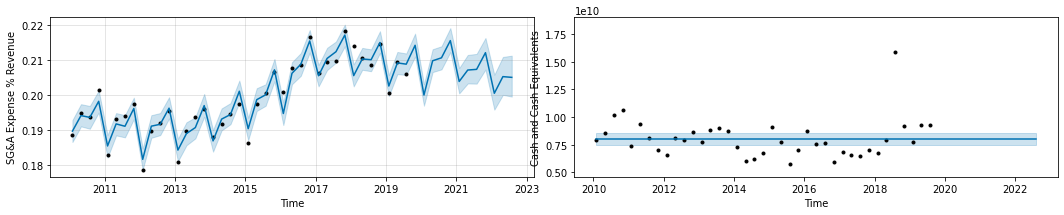

In [37]:
fcst_stmts.plot(subset=['sga', 'cash'])

## Adjust Existing Forecasts

While it is possible to use the `manual` forecast type and pass in the desired growth rates or levels from the beginning, it is often more convenient to first run the forecast, then simply adjust it. The `.to_manual` method of the forecast was added for this purpose.

Either `adjustments` or `replacements` can be passed while updating, and either the level of the item or the growth in the item can be used for the new manual forecast.

In [38]:
# boost second forecast period cash growth by 40%
cash_adjust = [0 for _ in range(12)]
cash_adjust[1] = 0.4
fcst_stmts.forecasts['cash'].to_manual(adjustments=cash_adjust)

fcst_stmts.forecasts['revenue'].to_manual(use_levels=True, replacements={1: 8e10})  # set second forecast period revenue to 80,000,000,000

The forecasts are modified in place. Now review the results of that:

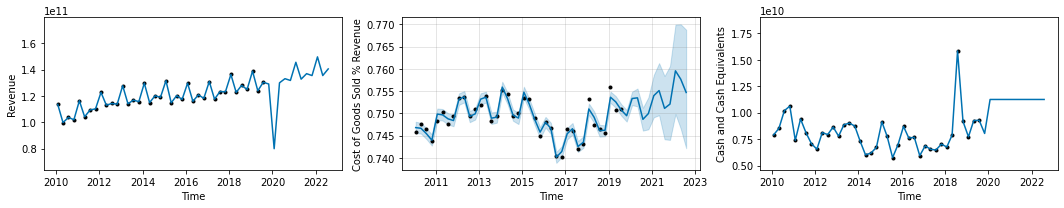

In [39]:
fcst_stmts.plot(subset=['revenue', 'cogs', 'cash'])